<a href="https://colab.research.google.com/github/vivvvek24/Junior-Data-Scientist-Assignment/blob/main/Junior_Data_Scientist_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 1**

Write a regex to extract all the numbers with orange color background from the below text in italics.


{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}


In [ ]:
data = {"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}

In [ ]:
import re

class RegEx:
    
    
    def __init__(self, data):
        self.data = data
        
    def extract_number(self):
        """Method Name: extract_number
           Description: It will return all the extracted numbers."""
        try:
            result = re.findall(r'\s[0-9]+', str(data))
            # \s | Matches whitespace characters, which include the \t, \n, \r, and space characters.
            # [0-9] | Matches from 0 to 9.
            # + | Greedily matches the expression to its left 1 or more times.
            return result
        except Exception as e:
            print('Error: ', e)

In [ ]:
extract = RegEx(data).extract_number()
print(extract)

[' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', ' 10', ' 11', ' 648', ' 649', ' 650', ' 651', ' 652', ' 653', ' 3']


# **PART 2**

**Train a machine learning model that 
predicts the customer who is going to be checked in.**

In [ ]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#changed excel file to csv file
df = pd.read_csv('/content/drive/MyDrive/Jr Data Scientist/train_data_evaluation_part_2.csv', index_col=0)

In [ ]:
#Viewing top five rows of the dataset
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Checking description of data.**

In [ ]:
#Checking the shape of the dataset
df.shape

(82580, 29)

In [ ]:
#summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,82580.0,41290.500000,23838.936952,1.0,20645.75,41290.5,61935.25,82580.00
Age,78834.0,45.468554,16.526276,-11.0,34.00,46.0,57.00,122.00
DaysSinceCreation,82580.0,459.138157,311.309295,12.0,183.00,406.0,728.00,1095.00
AverageLeadTime,82580.0,66.557205,87.928995,-1.0,0.00,30.0,104.00,588.00
LodgingRevenue,82580.0,300.457373,373.337007,0.0,66.40,234.0,403.80,21781.00
OtherRevenue,82580.0,67.890023,114.496223,0.0,2.00,39.0,88.00,7730.25
BookingsCanceled,82580.0,0.002047,0.067177,0.0,0.00,0.0,0.00,9.00
BookingsNoShowed,82580.0,0.000642,0.029725,0.0,0.00,0.0,0.00,3.00
BookingsCheckedIn,82580.0,0.798402,0.696880,0.0,1.00,1.0,1.00,66.00
PersonsNights,82580.0,4.667958,4.562507,0.0,1.00,4.0,7.00,116.00


In [ ]:
#basic information of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

# **Data Cleaning**

**Checking for null values**

In [ ]:
#checking for null values in dataset
df.isnull().sum()
df.isna().sum()

ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [ ]:
#dropping null values
df.dropna(inplace=True)

In [ ]:
#checking for missing values
df.isnull().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [ ]:
#checking for any duplicates
len(df[df.duplicated()])

0

In [ ]:
df.replace({'BookingsCheckedIn' : {1 : 'Yes', 2 : 'Yes',3 : 'Yes',4 : 'Yes',5 : 'Yes',6 : 'Yes',7 : 'Yes',8 : 'Yes',9 : 'Yes',10 : 'Yes',11 : 'Yes',12 : 'Yes',13 : 'Yes',14 : 'Yes',15 : 'Yes',17 : 'Yes',18 : 'Yes',20 : 'Yes',23: 'Yes',24 : 'Yes',25 : 'Yes',26 : 'Yes',29 : 'Yes',34: 'Yes',40 : 'Yes',57 : 'Yes',66 : 'Yes', 0 : 'No'}}, inplace = True)

In [ ]:
#Checking value counts of BookingsCheckedIn
df['BookingsCheckedIn'].value_counts()

Yes    60263
No     18571
Name: BookingsCheckedIn, dtype: int64

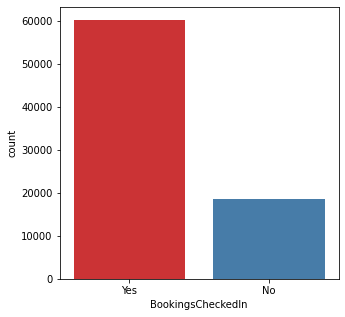

In [ ]:
#values count plot of BookingsCheckedIn
plt.figure(figsize=(5,5))
sns.countplot(x = 'BookingsCheckedIn', data = df, palette= "Set1")
plt.show()

**Here we can see that, Booking not checkedIn are less as compare to the Booking CheckedIn in the given dataset. And also we can see that both classes are not in proportion that is we have an imbalanced dataset.**

In [ ]:
#Checking value counts of Nationality
Nationality_df=df['Nationality'].value_counts().reset_index()
Nationality_df.rename(columns={'index': 'Nationality_Name'}, inplace=True)
Nationality_df.rename(columns={'Nationality': 'Count'}, inplace=True)
#top 5 Nationality
Nationality_df.head()

,Nationality_Name,Count
0,FRA,12307
1,DEU,10164
2,GBR,8610
3,PRT,7638
4,ESP,4863


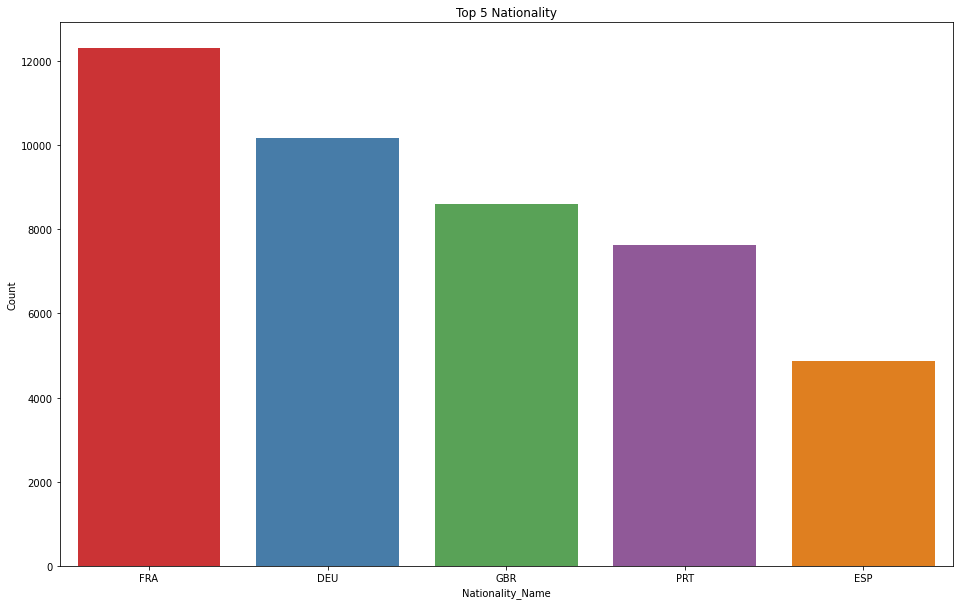

In [ ]:
# plotting values count for Nationality 
plt.figure(figsize=(16,10))
plt.title('Top 5 Nationality')
sns.barplot(x='Nationality_Name',y='Count',data=Nationality_df[:5], palette='Set1')

In [ ]:
df['MarketSegment'].value_counts()

Other                    45650
Travel Agent/Operator    11065
Direct                   10759
Groups                    8861
Corporate                 1882
Complementary              395
Aviation                   222
Name: MarketSegment, dtype: int64

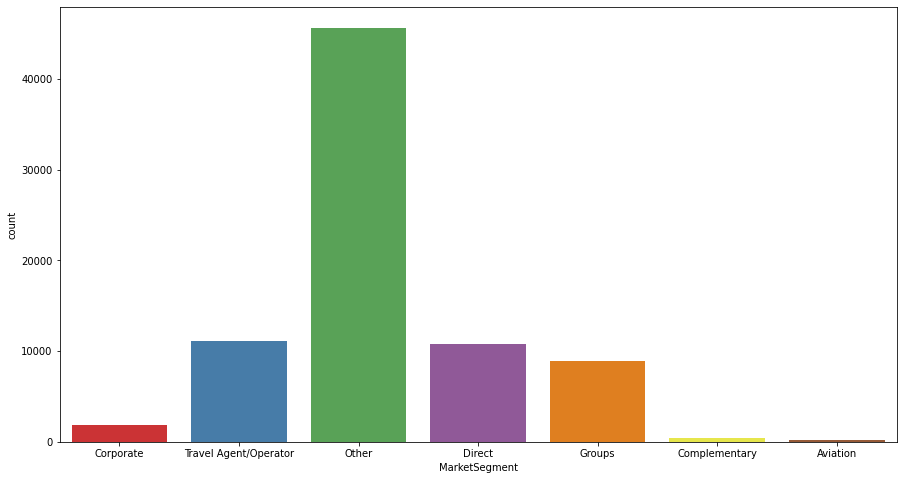

In [ ]:
#values count plot of BookingsCheckedIn
plt.figure(figsize=(15,8))
sns.countplot(x = 'MarketSegment', data = df, palette= "Set1")
plt.show()